<a href="https://colab.research.google.com/github/steed360/Data-Analysis/blob/main/a_Regression_Errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Create charts to illustrate and better understand which distributions of Y will produce linear regression models that satisfy the "regression assumptions", including:

- Error terms will be normally distributed
- Same std deviation for the error term regardless of position along X

Method:

Part One:

- Firstly start with a fitted model (calculating height for a given weight)
- Plot the regression line and the error distribution for a few points X
- Generate data for each xi,
  i.e. create normal distributions for yi~N( x*BI+ c, 4)
- In this simple example regression could be seen as basicaly a few conditional Normal Distributions
- Show the "dataset" that has so perfectly met these regression assumptions.
- Specifically gather the data sampled from Y1~N, Y2~N.. Y4~N into one array and show what distribution we get.  Is it Normally Distributed?

Part Two:

- Positively skewed data with long tails includes income data, travel data, survival times.
- Books warn that trying to explain such data with a regression model is likely to break the constant error variance "regression assumption"
- Repeat the data sampling in Part One (again sample from the regression equation)
- This time increase the variance for the last two points.
- Again, collect the conditional data sampled from each Xi and throw it all into one array.
- What is the shape of the distribution of the Y data?


### Plot a simple model showing the relationship between height and weight

In [123]:
#pip install arviz

In [111]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import scipy.stats as stats
import arviz as az
import plotnine
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine import *
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_line
from plotnine import ggplot  # https://plotnine.readthedocs.io/en/stable/

%matplotlib inline
from mizani import formatters # for better axis labelling
from matplotlib.ticker import FixedLocator, FixedFormatter
from matplotlib.patches import Rectangle


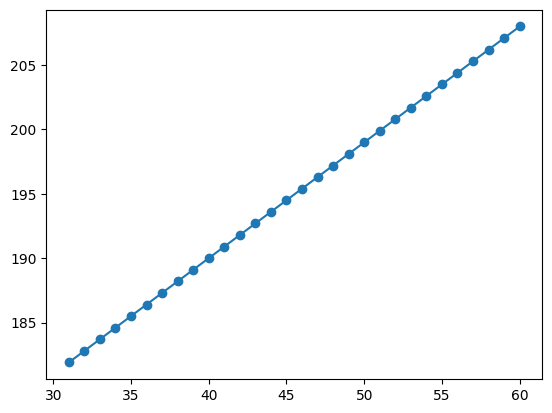

In [3]:
plt.plot (x,y, 'o-')

#### Sample from the normal distribution for each of the four points, specifically sample from N ( mu = 30, s= 5), N (mu=40, s=5) etc

In [9]:
mu1 = np.mean (npArray)
mu1

34.997355216653006

In [165]:
# Specify some x values.
lst_x =  [i for i in range ( 20,60, 10)]
np_x = np.array ( lst_x)


# Produce some Yi values using
# a model of height = function (weight) from Statistical Rethinking
# Place in a dict for later retrieval.

dictYi = {}

b_weight_kg = 0.9
c_avg_height_cm = 154
sd = 5.0  # standard deviation of errors.

for xi in lst_x:
  dictYi[xi] = c_avg_height_cm  + b_weight_kg * xi

N = 100000              # Number of data points to generate.


# Create a dataframe (with x as columns and yi~N() samples as rows)

df = pd.DataFrame()

for xi in lst_x:
    yi = dictYi[xi]
    df[xi] = stats.norm.rvs(yi , 5, N)

###################################

# A long version of this dataframe is needed for plotting as violin plots
import pandas.api.types as pdtypes # for (sorted) categories.
df_long = pd.melt(df,value_vars=[20,30,40,50]  )
df_long['variable'] = df_long['variable'].astype(pdtypes.CategoricalDtype(categories=[10,20,30,40,50,60]))


#####################################
# A simple data frame is needed to plot all xi, yi combinations
###################################

lst_Yi = [dictYi[xi] for xi in dictYi.keys() ]
data_x_y = pd.DataFrame ( {'x':lst_x,'y':lst_Yi})
data_x_y
data_x_y['variable'] = data_x_y['x'].astype(pdtypes.CategoricalDtype(categories=[20,30,40,50]))
data_x_y['group'] = 1

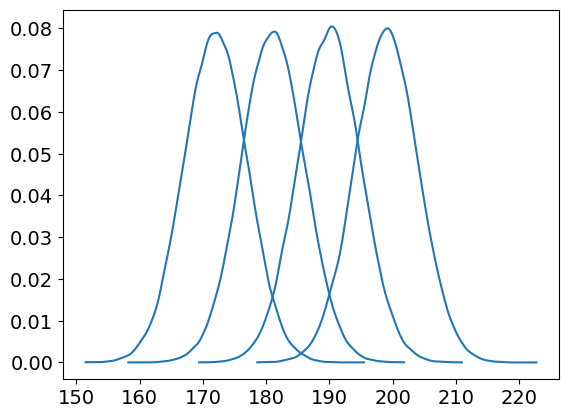

In [166]:

for thisX in lst_x:
    az.plot_kde (df[thisX])


Do violin plot

In [23]:
# define colors
#

GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
BLUE5, BLUE6 = '#92CDDD', '#2E869D'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1, ORANGE2, ORANGE3 = '#F79747', '#FAC090', '#F36721'

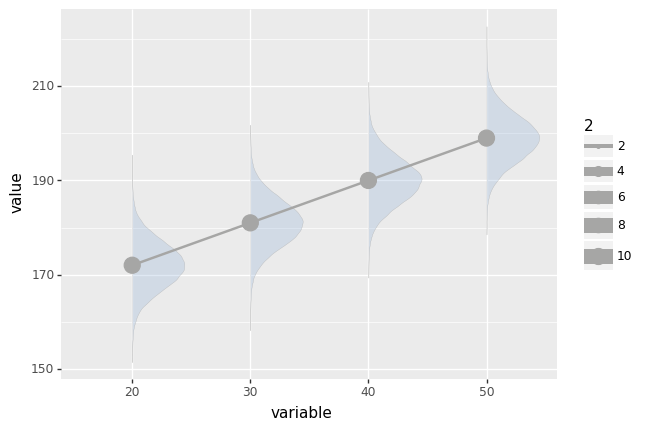

<ggplot: (8281292931577)>

In [169]:
from plotnine import geom_violin
from plotnine import ggplot, aes

t = theme(
          # Overrides
          axis_title_y = element_text(angle = 90, va = 'bottom', ha = 'left', size = 13, color = GRAY3, y = 0.52),
          axis_title_x = element_text(size = 9, color = GRAY3),
          panel_grid_major_y=element_blank()
)

lsize = 0.1
shift = -0.06
shift_point = 0.07

# For shifting the violin plot
def alt_sign(x):
    "Alternate +1/-1 if x is even/odd"
    #return (-1) ** x
    return

m1 = aes(x=stage('variable', after_scale='x+shift*x'))                 # shift outward
m2 = aes(x=stage('variable', after_scale='x+shift_point*x'))           # shift outward
m3 = aes( stage('variable', after_scale='x+shift_point*x' ),y='vals' )

fig = \
(ggplot(df_long, aes('variable', 'value',group = 'variable'))
  + geom_violin( alpha=0.3, color=GRAY8, fill=BLUE3, style="right", size=lsize)
  #+ geom_point(m2, alpha=0.005, color=GRAY8,size=0.2)
  + geom_line (data_x_y,aes( x='variable', y='y', group = 'group', size=2),color=GRAY8 )
  + geom_point (data_x_y, aes( x='variable', y='y',size=10), color=GRAY8 )
)

fig


<Axes: >

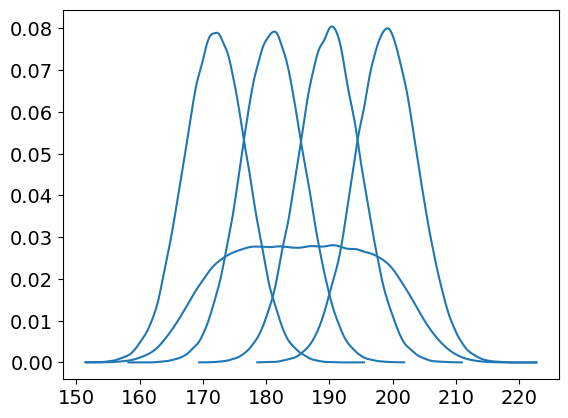

In [171]:



for thisX in lst_x:
    az.plot_kde (df[thisX])

# Now plot the
az.plot_kde  ( df_long['value'] )
